In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
from twitter.twitter_collection import TwitterCollection
from twitter.tweet_sentiment_analyzer import TweetSentimentAnalyzer
from data_pipelines.data_manipulation import DataManipulation
from dl_models.xgboost_forecaster import XgboostForecaster
from logger.logger import Logger


import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = 'ignore', category = pd.errors.PerformanceWarning)
%matplotlib inline

In [2]:
SYMBOL = 'BTC-USD'
SYMBOL_NAME = 'Bitcoin'
SYMBOL_CUT = 'btc'
scale = 1
range_list = [i for i in range(5,21)]
range_list = [i*scale for i in range_list]
interval = '1h'
start_date = '2020-06-30'
end_date = '2022-07-01'
source = 'yahoo'
LOG_PATH = '../logger' + os.sep + "logs"
LOG_FILE_NAME_PREFIX = f"log_{SYMBOL_CUT}_{start_date}_{end_date}"

logger = Logger(LOG_PATH, LOG_FILE_NAME_PREFIX)
tsa = TweetSentimentAnalyzer()
data = DataManipulation(SYMBOL, source, range_list, start_date=start_date, 
                        end_date=end_date, interval=interval, scale=scale, 
                        prefix_path='..', saved_to_csv=True,
                        logger=logger)
df_price = data.df.copy()

1 ) 13-03-2023 12_31_38 MainThread INFO\ Initialized logging at path ../logger/logs/log_btc_2020-06-30_2022-07-01_13-03-2023_12_31_38.log
2 ) 13-03-2023 12_31_39 MainThread DEBUG\ Get data from local file ../data/outputs/data_ind/BTC-USD/BTC-USD_df_2020-06-30_2022-07-01_1h.csv


In [3]:
data.df.head()

,ad,adx_10,adx_11,adx_12,adx_13,adx_14,adx_15,adx_16,adx_17,adx_18,...,wma_17,wma_18,wma_19,wma_20,wma_5,wma_6,wma_7,wma_8,wma_9,feature_label
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-06-10 18:00:00,20564.0862,17.5708,16.1132,14.8979,13.8703,12.9913,12.2334,11.5763,11.0091,10.5146,...,9761.8079,9761.6549,9761.6018,9761.6101,9784.6140,9780.3957,9777.5496,9774.5575,9771.9822,1.0000
2020-06-10 19:00:00,19843.8005,22.8987,20.7591,18.9735,17.4655,16.1789,15.0730,14.1169,13.2912,12.5720,...,9772.1948,9771.3208,9770.7074,9770.2283,9810.7340,9803.9186,9798.3418,9794.1342,9790.0820,1.0000
2020-06-10 20:00:00,18713.1416,27.6938,24.9826,22.7095,20.7841,19.1388,17.7233,16.4988,15.4390,14.5151,...,9783.1738,9781.6543,9780.3947,9779.4077,9833.3520,9825.3986,9818.4539,9812.5014,9807.7193,0.0000
2020-06-10 21:00:00,18782.3109,30.0457,27.1939,24.7649,22.6823,20.8856,19.3280,17.9721,16.7916,15.7576,...,9791.8198,9789.9334,9788.2278,9786.7752,9844.1647,9837.3629,9830.8964,9824.8842,9819.4791,1.0000
2020-06-10 22:00:00,19734.2543,32.9132,29.8664,27.2403,24.9673,22.9914,21.2674,19.7585,18.4378,17.2758,...,9804.7114,9802.2893,9800.0681,9798.0423,9864.0053,9857.6262,9850.8421,9844.3150,9838.1633,0.0000


In [4]:
sent_tweets = pd.read_csv('btc_archieve/btc_hourly_sent_score.csv')
#sent_tweets = pd.read_csv('../data/tweets_data/btc/btc_hour.csv')
sent_tweets.Datetime = pd.to_datetime(sent_tweets.Datetime)
sent_tweets.set_index('Datetime', inplace=True, drop=True)

In [5]:
sent_tweets.index = sent_tweets.index.tz_convert(None)

In [6]:
df_price_ext = data.extract_features()
close_col = df_price['close']
df_price_ext.head()

3 ) 13-03-2023 12_31_40 MainThread DEBUG\ Get features matrix from ../data/outputs/feature_data/BTC-USD BTC-USD_df_2020-06-30_2022-07-01_1h.csv


,st_stoch,st_ich,st_cut_ema5_sma10,st_macd,st_ich_close,st_dmi,st_cut_sma10_close,st_hisse,st_mfi,st_fishert,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,feature_label,kz_score
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-06-10 18:00:00,0,1,1,1,0,1,0,0,2,2,...,0,0,0,0,0,0,0,0,1.0000,1.3899
2020-06-10 19:00:00,0,1,1,1,1,1,0,0,3,2,...,0,0,0,0,0,0,0,0,1.0000,2.2258
2020-06-10 20:00:00,0,1,1,1,1,1,0,0,3,2,...,0,0,0,0,0,0,0,0,0.0000,2.2452
2020-06-10 21:00:00,0,1,1,1,1,1,0,0,3,2,...,0,0,0,0,0,0,0,0,1.0000,2.2396
2020-06-10 22:00:00,1,1,1,1,1,1,0,0,3,2,...,0,0,0,0,0,0,0,0,0.0000,2.3201


In [7]:
df_final = tsa.concat_ohlc_compound_score(df_price_ext, sent_tweets)
#df_final = df_final.loc['2021-01-01':,:].copy()
df_final = df_final.rename(columns={"compound_total":"twitter_sent_score"})
df_final.dropna(inplace=True)


Concantenation for sentiment score tweets and indicator MAtrix data


Text(0.5, 1.0, 'Bitcoin Proce')

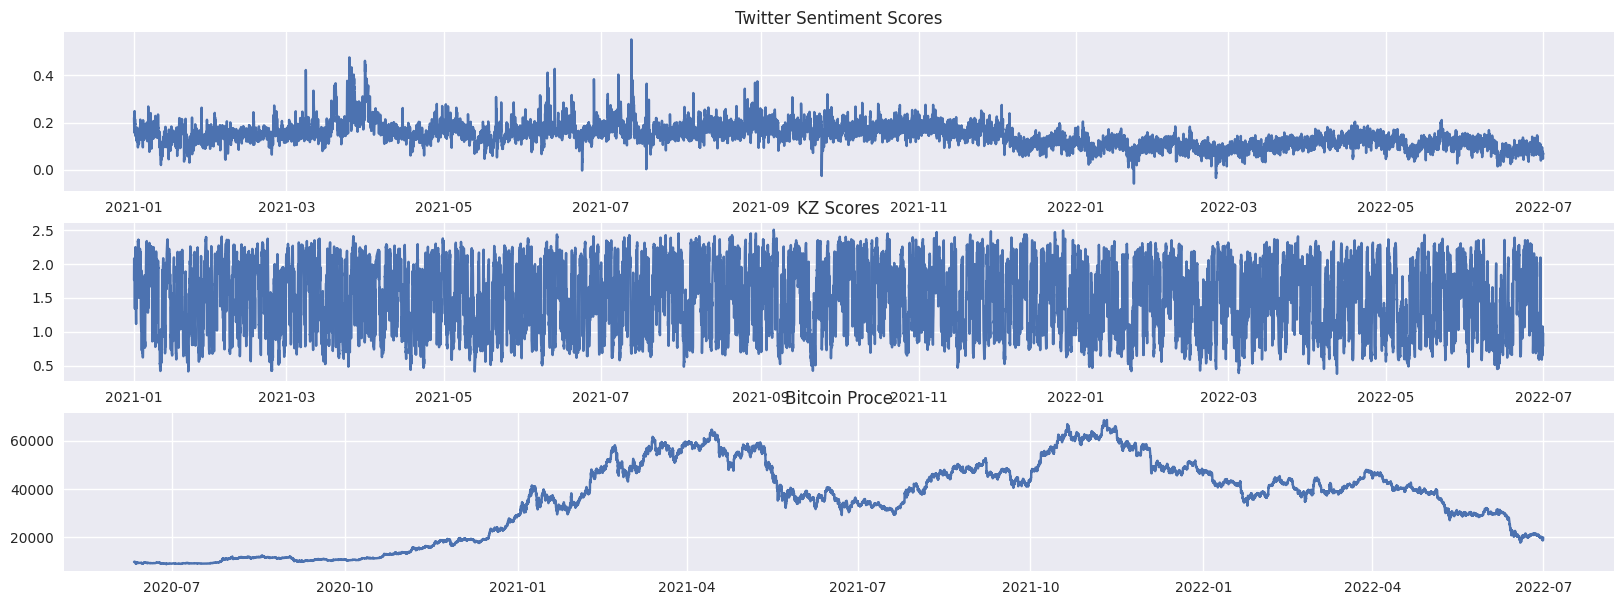

In [8]:
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(20,7))
ax1.plot(df_final.twitter_sent_score)
ax1.set_title('Twitter Sentiment Scores')
ax2.plot(df_final.index, df_final.kz_score)
ax2.set_title('KZ Scores')
ax3.plot(close_col)
ax3.set_title('Bitcoin Proce')

In [9]:
y = df_final.feature_label
X = df_final.drop(columns=['feature_label'], axis=1)

Creating X_train, X_test, y_train, y_test, evalset
[0]	validation_0-logloss:0.69236	validation_1-logloss:0.69305
[1]	validation_0-logloss:0.69158	validation_1-logloss:0.69291
[2]	validation_0-logloss:0.69081	validation_1-logloss:0.69283
[3]	validation_0-logloss:0.69006	validation_1-logloss:0.69277
[4]	validation_0-logloss:0.68932	validation_1-logloss:0.69264
[5]	validation_0-logloss:0.68859	validation_1-logloss:0.69260
[6]	validation_0-logloss:0.68788	validation_1-logloss:0.69254
[7]	validation_0-logloss:0.68715	validation_1-logloss:0.69252
[8]	validation_0-logloss:0.68642	validation_1-logloss:0.69244
[9]	validation_0-logloss:0.68572	validation_1-logloss:0.69239
[10]	validation_0-logloss:0.68500	validation_1-logloss:0.69231
[11]	validation_0-logloss:0.68428	validation_1-logloss:0.69227
[12]	validation_0-logloss:0.68361	validation_1-logloss:0.69226
[13]	validation_0-logloss:0.68296	validation_1-logloss:0.69225
[14]	validation_0-logloss:0.68223	validation_1-logloss:0.69222
[15]	validatio

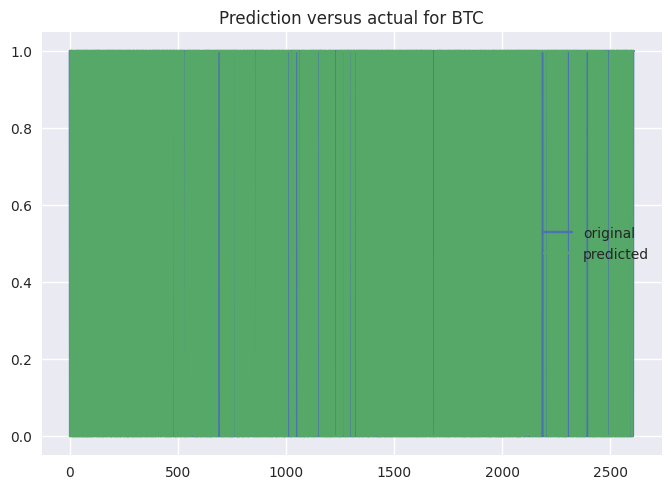

In [10]:
#y = (df_final.feature_label > 0).astype(int)                            #df_final.feature_label
#df_final.drop(columns=['feature_label'], axis=1)
from sklearn.metrics import accuracy_score, confusion_matrix

eval_metric = 'logloss'
eval_metric = None
xgb = XgboostForecaster(objective='binary', n_estimators=500, eta=0.01, max_depth=7, 
                    tree_method='gpu_hist', eval_metric='logloss')
xgb.create_train_test_data(X, y, test_size=0.2)
xgb.fit()
xgb.save_model(f'../dl_models/model_stack/model_price_{interval}_feature_numbers_{X.shape[1]}.json')
score = xgb.get_score()
print(f'first score: {score}')
#xgb.plot_learning_curves()
xgb.get_model_names('../dl_models/model_stack/')
#best_params = xgb.bestparams_gridcv([100, 200], [0.1], [1, 3], verbose=3)

ytest = xgb.y_test
ypred_reg = xgb.model.predict(xgb.X_test)
#print(f'Last accuracy: {accuracy_score(ytest, ypred_reg)}')
#print(f'Confusion Matrix: {confusion_matrix(ytest, ypred_reg)}')
x_ax = range(len(xgb.y_test))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred_reg, label="predicted")
plt.title("Prediction versus actual for BTC")
plt.legend()
plt.show()
#yhat = (xgb.model.predict(xgb.X_test) > 0).astype(int)
#y_ = (xgb.y_test > 0).astype(int)
#accuracy = accuracy_score(yhat, y_)
#print('Accuracy: %.3f' % accuracy)

{'st_ich': 0.0, 'st_cut_ema5_sma10': 0.0, 'st_dmi': 0.0, 'st_hisse': 0.0, 'st_ema_6': 0.0, 'st_cut_ema_5_6': 0.0, 'st_ema_10': 0.0, 'st_ema_11': 0.0, 'st_ema_12': 0.0, 'st_cut_ema_11_12': 0.0}


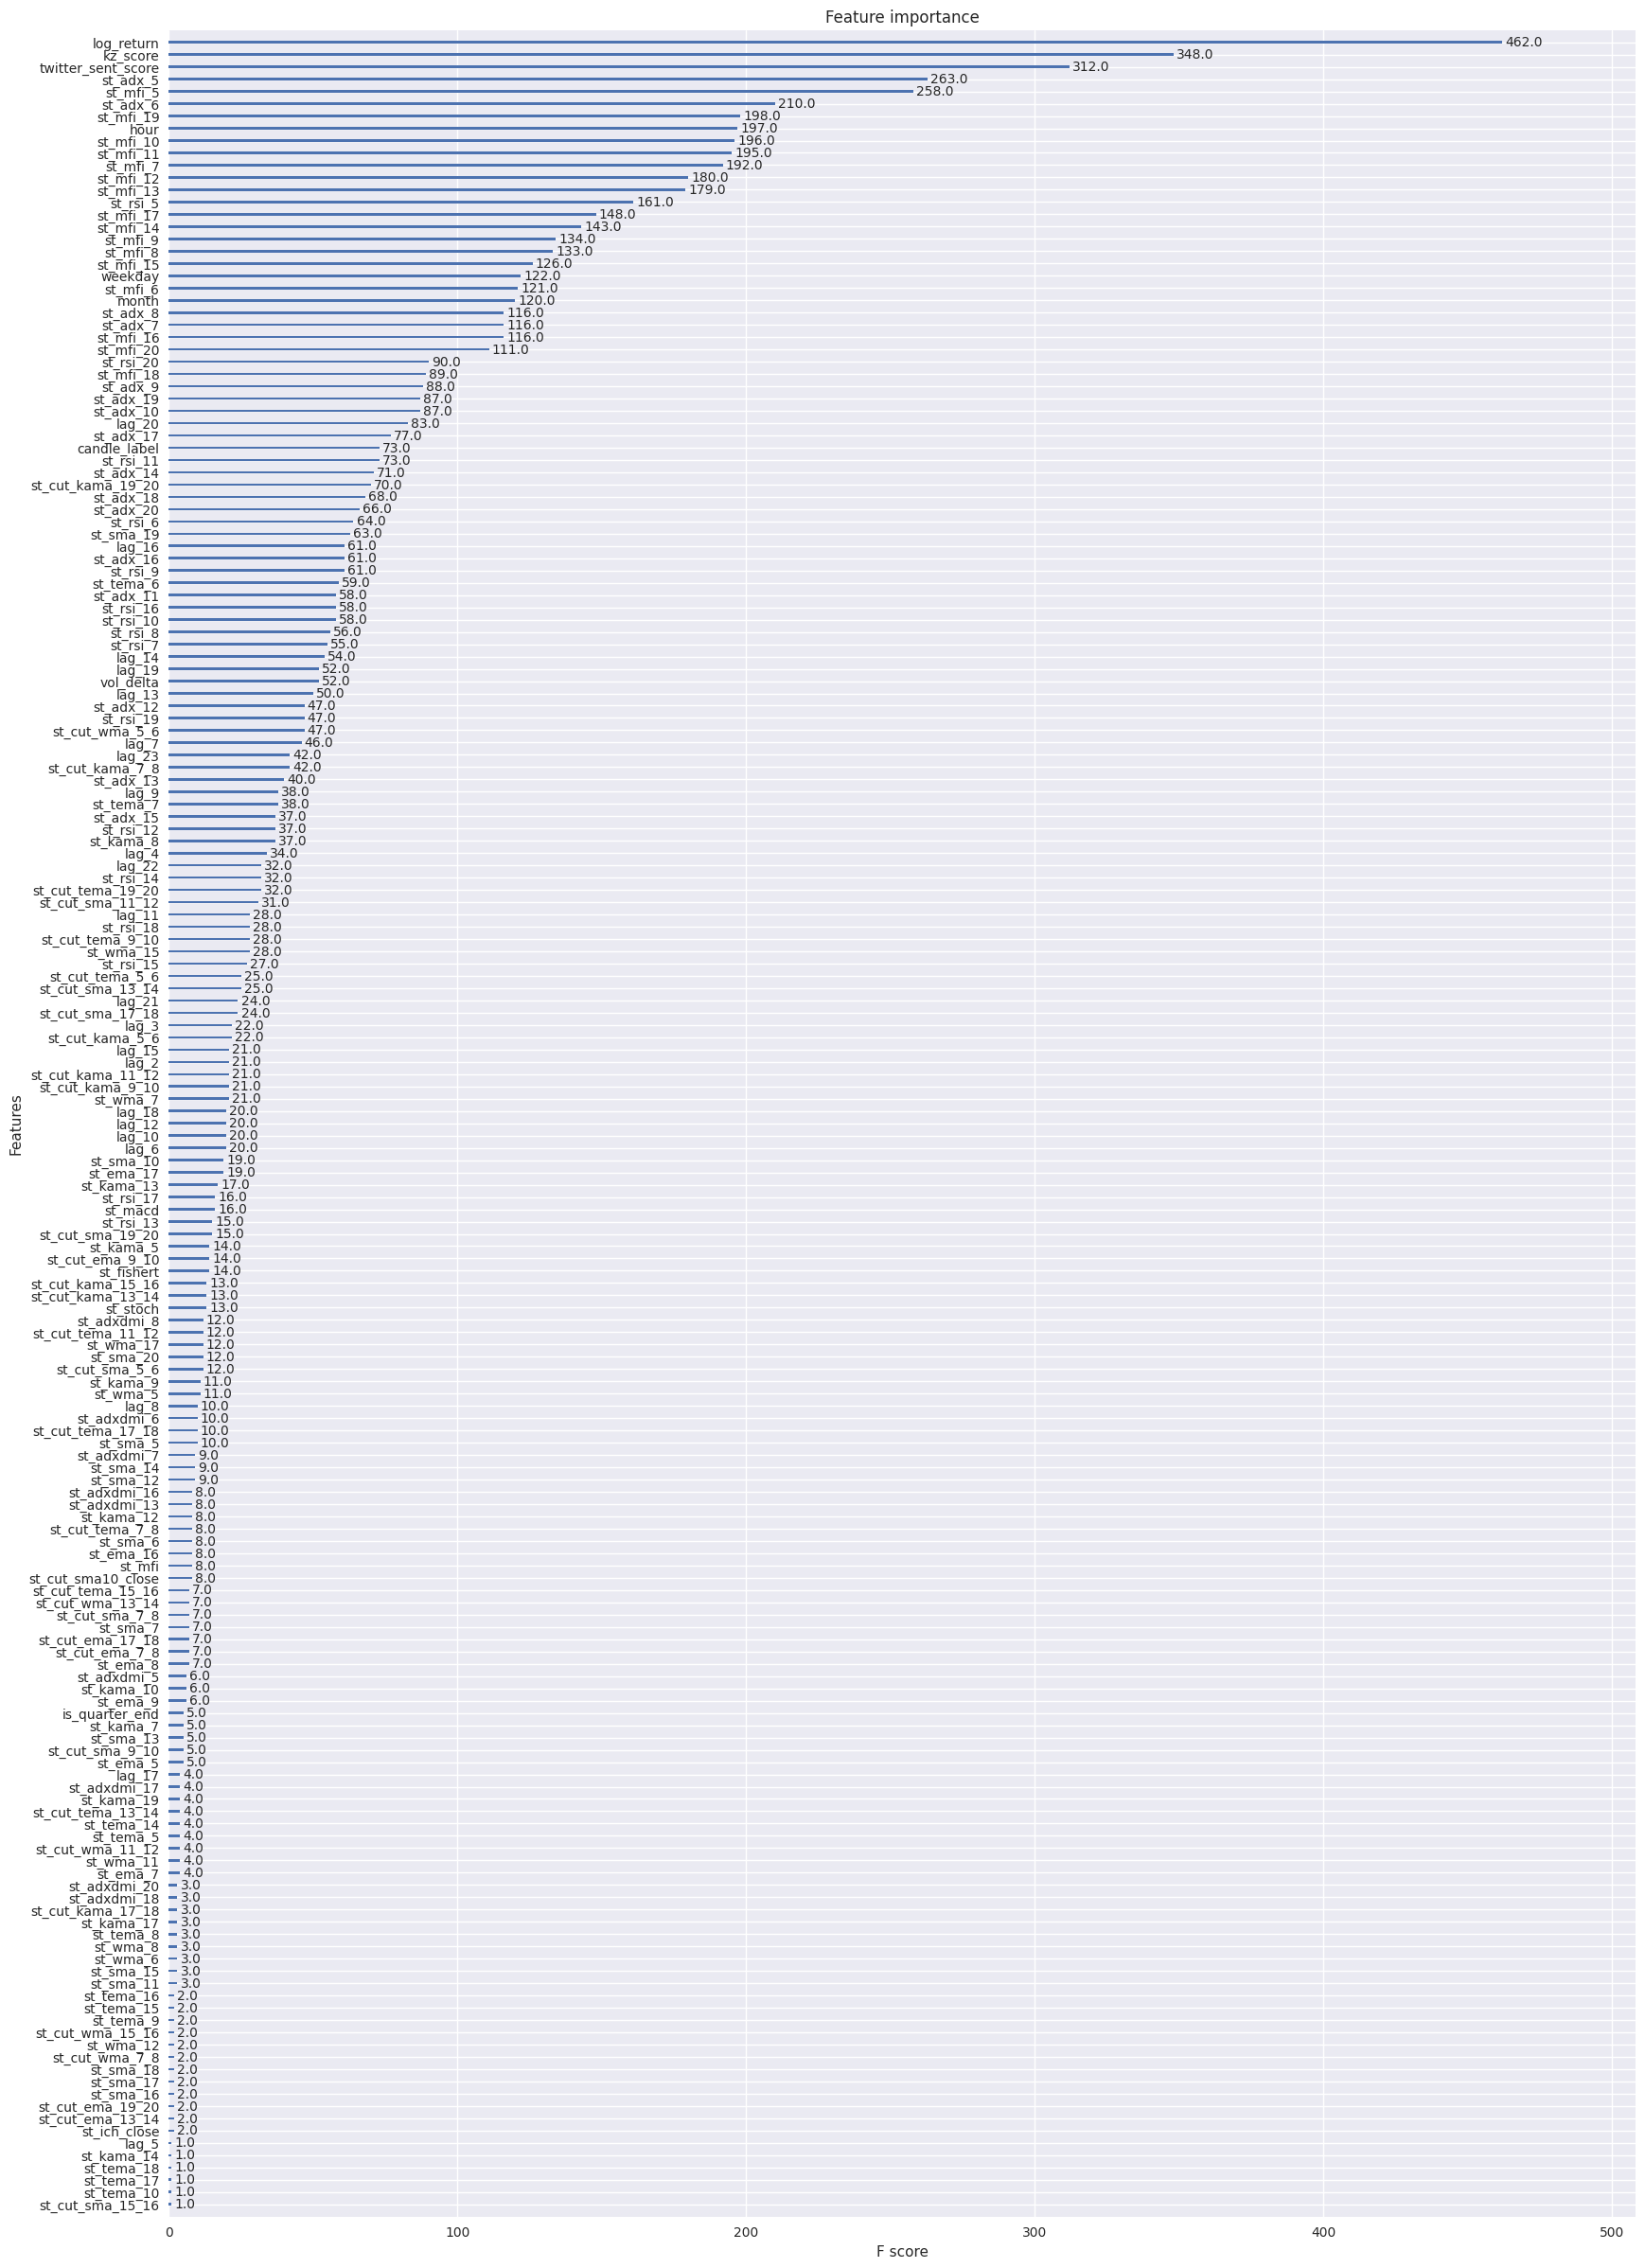

In [11]:
n_feat = xgb.get_n_importance_features(10)
print(n_feat)

xgb.plot_fature_importance()

Learning curves ploting and saved


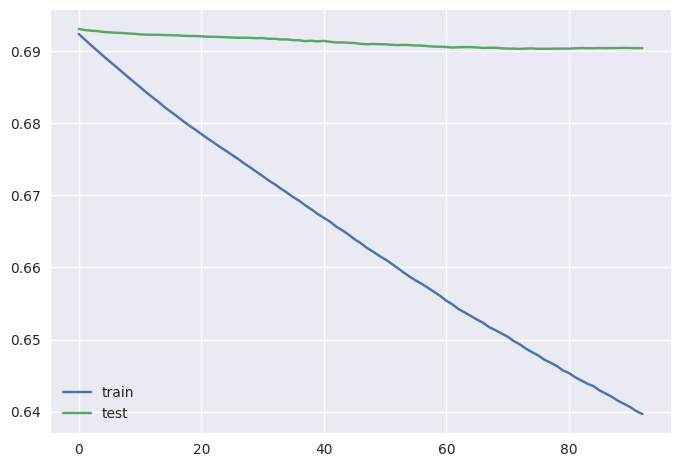

In [12]:
xgb.plot_learning_curves()